# Bar Chart Demonstration

- [Clustered Bar Charts]()
- [Adapted Bar Charts using `sns.barplot()`]()

### Example 1:

Display the count of Pokémon introduced in each generation using **bar chart** with the 'generation_id' column.

In [2]:
pokemon = pd.read_csv('data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [4]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


In [6]:
pokemon.generation_id.unique()

array([1, 2, 3, 4, 5, 6, 7])

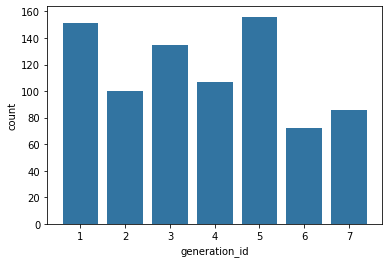

In [8]:
base_color = sns.color_palette()[0]

sns.countplot(data=pokemon, x='generation_id', color=base_color)

# Make margins of bars at head and tail less closer to the axis (spines)
plt.margins(.05);

If we want to rearrange these bars in **descending order**,we can use the `order` argument, as follows.

In [13]:
pokemon.generation_id.value_counts().index.values

array([5, 1, 3, 4, 2, 7, 6])

In [14]:
gen_cnt_order = pokemon.generation_id.value_counts().index.values

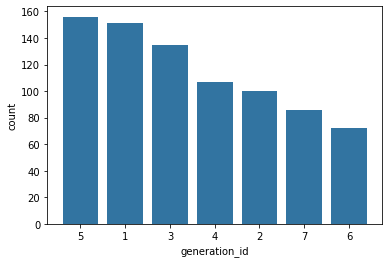

In [15]:
base_color = sns.color_palette()[0]

sns.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_cnt_order)

# Make margins of bars at head and tail less closer to the axis (spines)
plt.margins(.05);

### Example 2:

Using **bar chart**, display the total count of Pokémon based on _type_.

_Notice:_ Each Pokémon species has either type_1, type_2 or both types that play a part in its offensive and defensive capabilities.

**STEPS:**

1. Select the `id`, and `species` columns from pokemon. 
2. Remove the `type_1`, `type_2` columns from pokemon
3. Add a new column `type_level` that can have a value either `type_1` or `type_2`
4. Add another column `type` that will contain the actual value contained in the `type_1`, `type_2` columns. 

In [17]:
pokemon = pd.read_csv('data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [22]:
pd.melt(pokemon,
    id_vars=['id'],
    value_vars=['type_1', 'type_2'],
    var_name='type',
    value_name='type_name',
    ignore_index = True,)

,id,type,type_name
0,1,type_1,grass
1,2,type_1,grass
2,3,type_1,grass
3,4,type_1,fire
4,5,type_1,fire
...,...,...,...
1609,803,type_2,NaN
1610,804,type_2,dragon
1611,805,type_2,steel
1612,806,type_2,ghost


In [23]:
# what it looks like if dropna
# 
pd.melt(pokemon,
    id_vars=['id'],
    value_vars=['type_1', 'type_2'],
    var_name='type',
    value_name='type_name',
    ignore_index = True,).dropna()

,id,type,type_name
0,1,type_1,grass
1,2,type_1,grass
2,3,type_1,grass
3,4,type_1,fire
4,5,type_1,fire
...,...,...,...
1607,801,type_2,fairy
1608,802,type_2,ghost
1610,804,type_2,dragon
1611,805,type_2,steel


In [24]:
# reconstruct and integrate the type_1 and type_2 columns
pkmn_types = pd.melt(pokemon, \
                     id_vars=['species'], \
                     value_vars=['type_1', 'type_2'], \
                     var_name='type_level', \
                     value_name='type')

# drop the nulls. `drop=True` means not insert the original index into feature cols.
pkmn_types = pkmn_types.dropna().reset_index(drop=True)
pkmn_types.head()

,species,type_level,type
0,bulbasaur,type_1,grass
1,ivysaur,type_1,grass
2,venusaur,type_1,grass
3,charmander,type_1,fire
4,charmeleon,type_1,fire


In [25]:
pkmn_types

,species,type_level,type
0,bulbasaur,type_1,grass
1,ivysaur,type_1,grass
2,venusaur,type_1,grass
3,charmander,type_1,fire
4,charmeleon,type_1,fire
...,...,...,...
1207,magearna,type_2,fairy
1208,marshadow,type_2,ghost
1209,naganadel,type_2,dragon
1210,stakataka,type_2,steel


In [26]:
# the rows will be expanded as 2 time as the original
print("Before melt: {0}. After melt: {1}".format(pokemon.shape, pkmn_types.shape))

Before melt: (807, 14). After melt: (1212, 3)


In [27]:
# Display the frequency of each type.
print('The frequency of each type is:\n', pkmn_types['type_level'].value_counts(), sep='')

The frequency of each type is:
type_1    807
type_2    405
Name: type_level, dtype: int64


In [28]:
# get order of bars by frequency
type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [29]:
type_order = type_counts.index.values
type_order

array(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'], dtype=object)

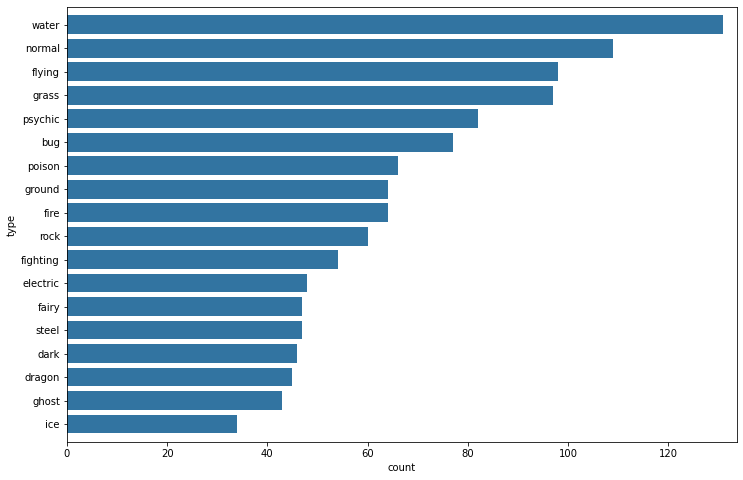

In [32]:
plt.figure(figsize=(12,8))

base_color = sns.color_palette()[0]

sns.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)

plt.margins(.02);

___Variations___:

Create a ___relative frequency___ plot of the proportion of Pokémon with each type, sorted from most frequent to least.

**Notice:** The sum across bars should be greater than 100%, since many Pokémon have two types. (Which means the denominator should be the sum of `id`s, but not `type`)

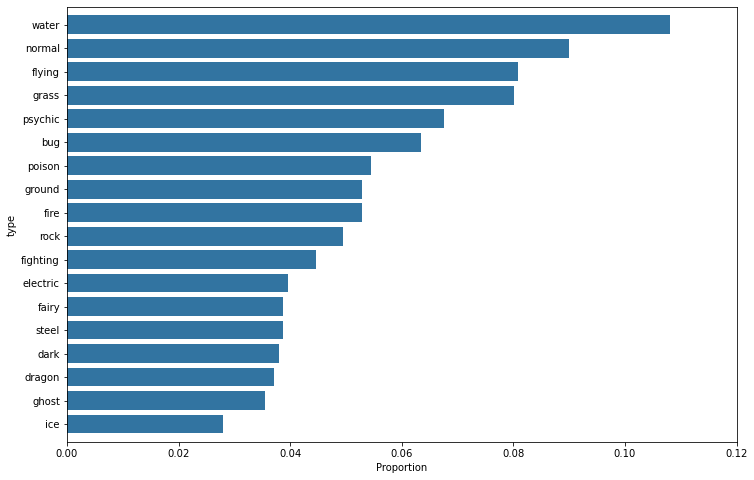

In [35]:
# Compute largest proportion
# Returns the sum of all not-null values in `type` column
n_pokemon = pkmn_types['type'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon

# establish tick locations and create plot
base_color = sns.color_palette()[0]

# 如果不加.02，坐标轴上将不会显示0.12
tick_props = np.arange(0, max_prop+.02, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(12,8))
base_color = sns.color_palette()[0]
sns.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.margins(.02)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('Proportion');

Let absolute counts map on the axis, but at the end of each bar shows the relative frequency??

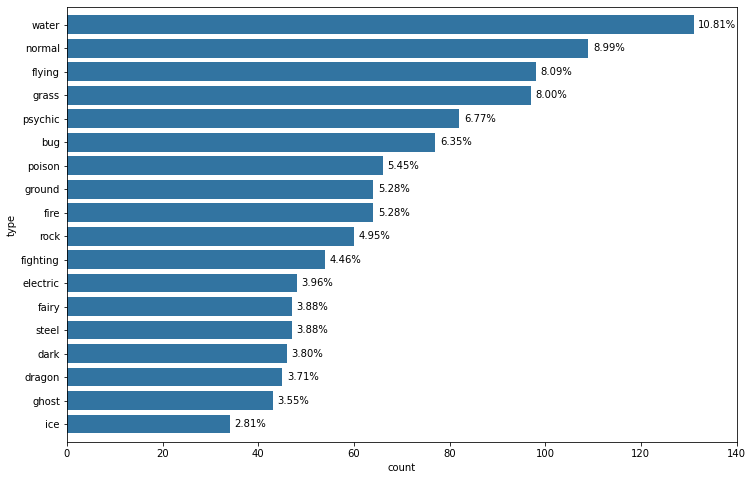

In [49]:
plt.figure(figsize=(12,8))

# Avoid distracting color
base_color = sns.color_palette()[0]

# Main plotting
sns.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)

# Get total number of types
type_cnt_total = type_counts.sum()

for i in range(type_counts.shape[0]):
    cnt = type_counts[i]
    proportion = cnt/type_cnt_total
    text_string = "{:.2%}".format(proportion)
    
    plt.text(cnt+1, i, text_string, va='center')

plt.xlim(0, 140)
    
plt.margins(.02);

另一种方法：
通过`.get_text()`

```python
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')


```

### Example 3: Visualize Missing Values in Features (Columns)

In [51]:
sales_data = pd.read_csv('data/sales-data.csv')

In [52]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [55]:
na_counts = sales_data.isna().sum()

In [61]:
na_counts_df = pd.DataFrame(sales_data.isna().sum(), columns=['num_na']).reset_index()

na_counts_df = na_counts_df.rename(columns={'index': 'feature_name'})

na_counts_df

,feature_name,num_na
0,Store,0
1,Date,0
2,Temperature,0
3,Fuel_Price,0
4,MarkDown1,4158
5,MarkDown2,5269
6,MarkDown3,4577
7,MarkDown4,4726
8,MarkDown5,4140
9,CPI,585


In [72]:
na_counts_df.num_na[10]

585

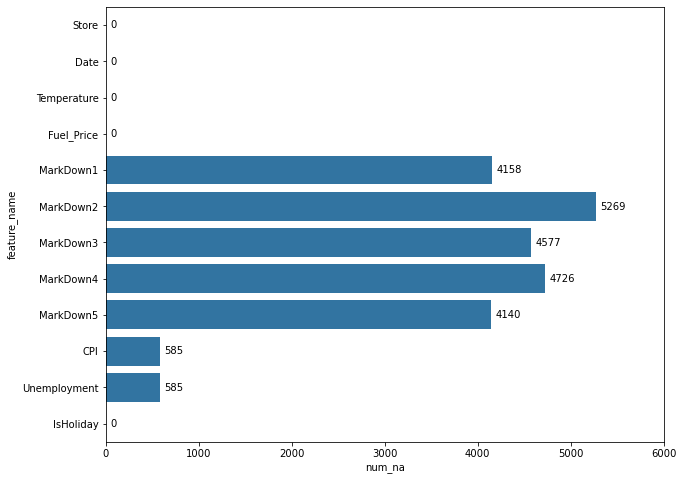

In [78]:
plt.figure(figsize=(10, 8))
sns.barplot(data=na_counts_df, y='feature_name', x='num_na', color=sns.color_palette()[0])

for i in range(na_counts_df.shape[0]):
    each_count = na_counts_df.num_na[i]
    
    plt.text(each_count+50, i, each_count, va='center')

plt.xlim(0, 6000);

### 平均综合效率与汽车品牌之间的差异

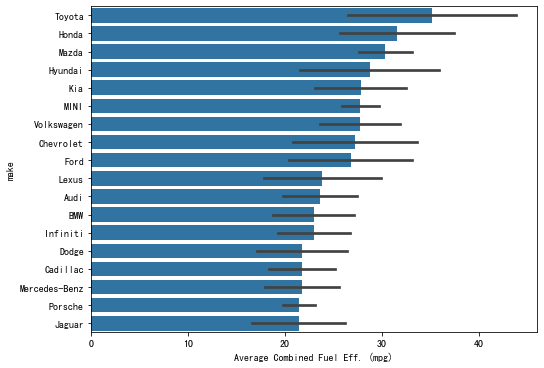

In [73]:
plt.figure(figsize=(8,6))
freq_makes = fuel_econ.make.value_counts()

# 统计各类别中样本数量在80以上的类别（’make‘字段）
threshhold = 80
total = np.sum(freq_makes > threshhold)

# 取出满足上述要求的所有类别（前18个类别）
most_makes = freq_makes.index[:total]
# most_makes

fuel_econ_sub = fuel_econ[fuel_econ['make'].isin(most_makes)]
make_means = fuel_econ_sub.groupby('make').mean()
# make_means

# 按照’comb‘降序排序，取出对应的index
comb_order = make_means.sort_values('comb', ascending=False).index

base_color = sns.color_palette()[0]
sns.barplot(data=fuel_econ_sub, x='comb', y='make', color=base_color, order=comb_order, ci='sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)');

## Clustered Bar Charts

**Study the relationship between two categorical variables, an alternative way to heat map.**

To depict the relationship between **two categorical variables**, we can extend the univariate bar chart into a clustered bar chart. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an **order** that makes the plot **easy to interpret**. 

In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This can be easily achieved by using `seaborn`'s `sns.countplot()` function under the `hue` argument:

### Example 1: Make comparisions betweencar car type and transmission types.

In [4]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Preparatory Step 1: Convert the `VClass` column from a plain object type into an ordered categorical type.**

In [10]:
fuel_econ.VClass.unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [12]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclass = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

fuel_econ.VClass = fuel_econ.VClass.astype(vclass)

In [13]:
fuel_econ.VClass

0       Subcompact Cars
1          Compact Cars
2          Compact Cars
3          Compact Cars
4          Midsize Cars
             ...       
3924       Midsize Cars
3925       Midsize Cars
3926       Midsize Cars
3927       Midsize Cars
3928       Midsize Cars
Name: VClass, Length: 3929, dtype: category
Categories (5, object): ['Minicompact Cars' < 'Subcompact Cars' < 'Compact Cars' < 'Midsize Cars' < 'Large Cars']

**Preparatory Step 2: Add a new column for transmission type - Automatic or Manual.**

In [14]:
fuel_econ.trans

0                        Automatic (AM6)
1                      Automatic (AM-S6)
2                         Automatic (S6)
3                         Automatic (S6)
4                         Automatic (S6)
                      ...               
3924    Automatic (variable gear ratios)
3925                     Automatic (AM6)
3926                     Automatic (AM6)
3927                     Automatic (S10)
3928                     Automatic (S10)
Name: trans, Length: 3929, dtype: object

In [21]:
fuel_econ.trans.str.split(' ')

0                          [Automatic, (AM6)]
1                        [Automatic, (AM-S6)]
2                           [Automatic, (S6)]
3                           [Automatic, (S6)]
4                           [Automatic, (S6)]
                        ...                  
3924    [Automatic, (variable, gear, ratios)]
3925                       [Automatic, (AM6)]
3926                       [Automatic, (AM6)]
3927                       [Automatic, (S10)]
3928                       [Automatic, (S10)]
Name: trans, Length: 3929, dtype: object

In [27]:
fuel_econ['trans_type'] = fuel_econ.trans.str.split(' ').apply(lambda x: x[0])

In [30]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


**Step 3. Plot the clustered bar chart**

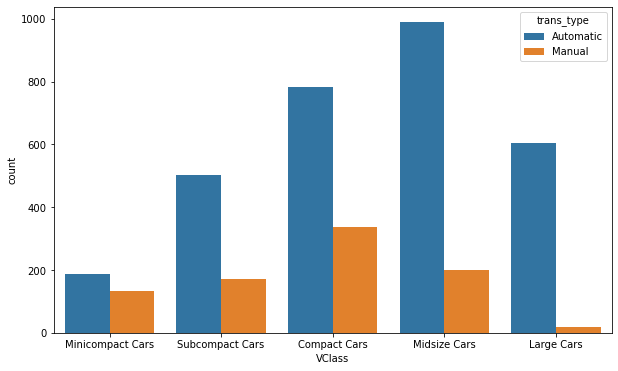

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type');

#### Use `sns.heatmap()` as a comparison for the same example.

**Preparatory Step 1: Self-define a categorical data type.**

In [ ]:
# # create a new column that only contains 'automatic' & 'manual' type
# fuel_econ['trans_type'] = fuel_econ.trans.apply(lambda x:x.split()[0])

# # Convert the "VClass" column from a plain object type into an ordered categorical type

# # Types of sedan cars
# sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# # Returns the types for sedan_classes with the categories and orderedness
# # Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
# vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# # Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
# fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

**Preparatory Step 2: Make summary on the dataset before drawing heat map。**

In [96]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [97]:
ct_counts = ct_counts.reset_index()
ct_counts = ct_counts.rename(columns={0: 'count'})
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [98]:
ct_counts = ct_counts.pivot_table(index='VClass', columns='trans_type', values='count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


**Step 3: Plot the heat map.**

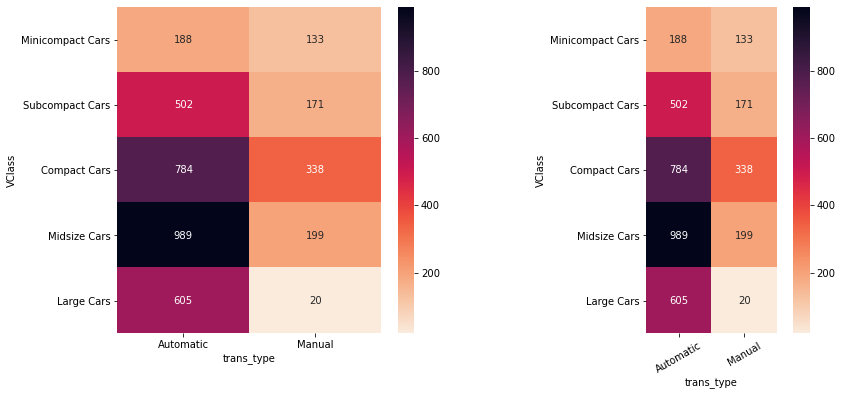

In [99]:
plt.figure(figsize=(13, 6))

plt.subplot(121)
sns.heatmap(ct_counts, annot=True, fmt='d', cmap='rocket_r')
# cmap = = sns.cm.rocket_r

plt.subplot(122)
sns.heatmap(ct_counts, annot=True, fmt='d', square=True, cmap='rocket_r')
plt.xticks(rotation=30);

### Example 2: Explore whether or not there differences in recommended fuel type depending on the vehicle class.

___Context:___

Only investigate the difference between the two main fuel types found in the `fuelType` variable: **Regular Gasoline and Premium Gasoline**. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.)

In [100]:
fuel_econ.fuelType.value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

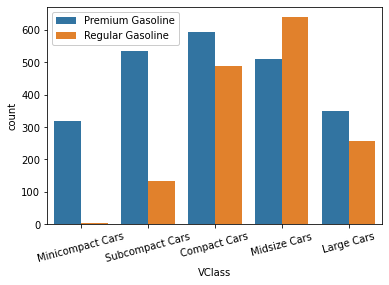

In [104]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

# plotting
ax = sns.countplot(data = fuel_econ_sub, x = 'VClass', hue = 'fuelType')
ax.legend(loc = 2, framealpha = 1) # lower right, no transparency
plt.xticks(rotation = 15);

**Heat Map as an alternative way ...**

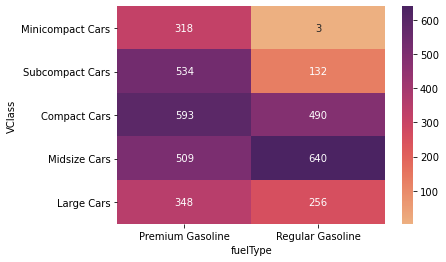

In [108]:
fv_counts = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline']), :]
fv_counts = fv_counts.groupby(['VClass', 'fuelType']).size().reset_index()
fv_counts = fv_counts.rename(columns={0: 'count'})
fv_counts = fv_counts.pivot_table(index='VClass', columns='fuelType', values='count')
sns.heatmap(data=fv_counts, annot=True, cmap='flare', fmt='d');


As shown above, clustered bar chart is easier to interpret.

    
___Conclusions:___
From this plot, you can see that more cars use premium gas over regular gas, and that the smaller cars are biased towards the premium gas grade. It is only in midsize sedans where regular gasoline was used in more cars than premium gasoline.


___Complementary Material -- About the color palette___

`sns.color_palette` <a href='https://seaborn.pydata.org/tutorial/color_palettes.html'>docs</a>

In [84]:
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

In [86]:
sns.color_palette("rocket_r")

[(0.96516917, 0.70776351, 0.5606593),
 (0.95381595, 0.46373781, 0.31769923),
 (0.8833417, 0.19830556, 0.26014181),
 (0.67824099, 0.09192342, 0.3504148),
 (0.43860848, 0.12177004, 0.34119475),
 (0.20973515, 0.09747934, 0.24238489)]

In [94]:
cmp = sns.color_palette("mako_r", as_cmap=True)

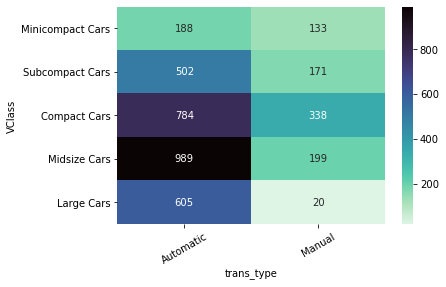

In [95]:
sns.heatmap(ct_counts, annot=True, fmt='d', cmap=cmp)
plt.xticks(rotation=30);

## Adapted Bar Charts

**Sometimes the height of the bars don't have to be number of counts. We can assign the bar heights to any statiscs of interest, thus adding a second variable to the bar charts which we call adapted bar charts for bivariate or multi-variate. Here we use `sns.barplot()` function.**

___Notice:___

The default `estimator` for `sns.barplot()` is **mean of each categorical bin.**

### I. Use `sns.barplot()`

### Example 1: How the mean of efficiency is distributed for each car type?

- Parameters `errwidth`, `ci`, `linestyle`

___Notice:___

1. Setting `ci=None` or `errwidth=0` can all make errorbars ___invisible___.

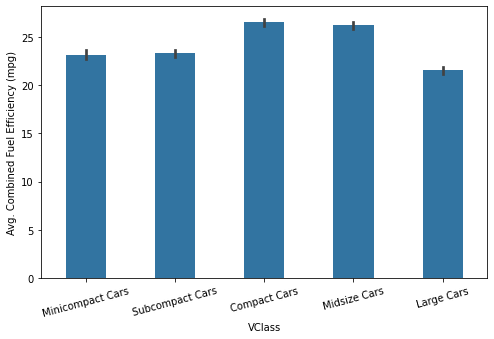

In [158]:
def change_width(ax, new_value):
    """Function to change the bar width."""
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


# Use sns.barplot() to draw        
fig, ax = plt.subplots(figsize=(8, 5));

# Uniform the bar color
base_color = sns.color_palette()[0]

# Default estimator is to calculate the mean of `comb` within each categorical (car type).
sns.barplot(data=fuel_econ, x='VClass', y='comb', ax=ax, color=base_color)

change_width(ax, 0.45)

plt.xticks(rotation=15)

plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

The bar plot above - The bar heights indicate the mean value on the numeric variable, with error bars plotted to show the uncertainty in the mean based on variance and sample size.

**Make the errorbar invisible.**

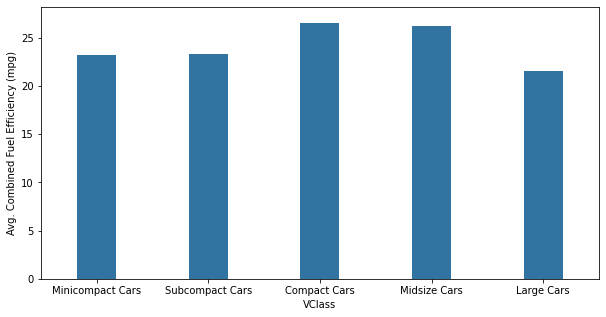

In [170]:
fig, ax = plt.subplots(figsize=(10, 5));

sns.barplot(data=fuel_econ, x='VClass', y='comb', ax=ax, color=base_color, errwidth=0)

change_width(ax, .35)

plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');


**Set `ci='sd'`**

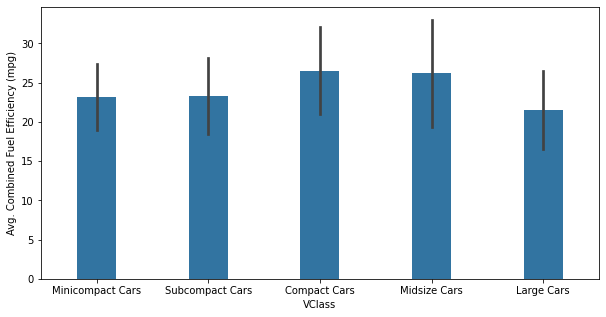

In [169]:
fig, ax = plt.subplots(figsize=(10, 5));

sns.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')

change_width(ax, .35)

plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');



### II. Use `sns.pointplot()` as an alternative.

- Parameters `linestyle`

### Example 2: 

**The context is as the same as above.**

**Setting `linestyle=""` or `join=False` to separate te=he lines between each category.**

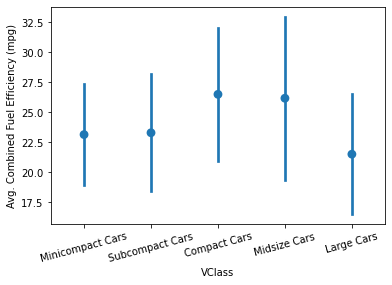

In [177]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

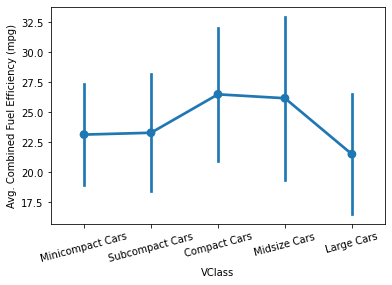

In [179]:
sns.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

<b>
So far, the variable types are as follows:

- categorical variable (x-axis)
- numberic variable (y-aixs)
    
Next, we are considering to add in a new categorical variable `trans_type` by using `sns.FacetGrid()` and `.map()` methods.    

</b>

### Example 3. Bringing a few charts together

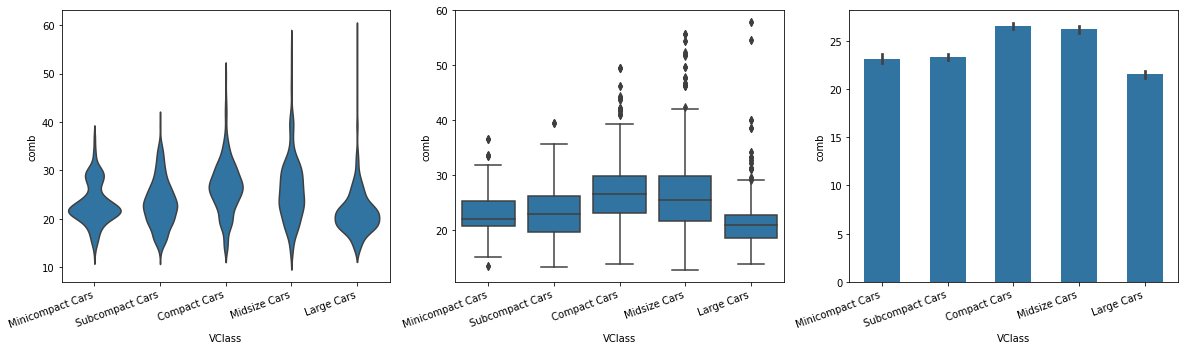

In [209]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# plt.figure(figsize = [20, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
sns.violinplot(data=fuel_econ, ax=axes[0], x='VClass', y='comb', inner = None, color = base_color)

# rotate the ticks due to small subplot size
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=20, ha='right')

# center plot: box plot
sns.boxplot(data=fuel_econ, ax=axes[1], x='VClass', y='comb', color = base_color)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=20, ha='right')

# right plot: adapted bar chart
sns.barplot(data=fuel_econ, ax=axes[2], x='VClass', y='comb', color = base_color)
change_width(axes[2], .55)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=20, ha='right');

### Example 4:  Plot the mean fuel efficiency for each manufacturer with at least 80 cars in the `fuel_econ` dataset.

#### Step 1: Filter out the manufacturer with at least 80 cars.

In [211]:
threshold = 80

make_freq_mask = fuel_econ['make'].value_counts() > threshold

n_make_freq = np.sum(make_freq_mask)

make_freq_idx = fuel_econ['make'].value_counts()[make_freq_mask].index

most_makes = fuel_econ[fuel_econ['make'].isin(make_freq_idx)]

print("There are {} manufacturers with output beyond {}.\n".format(n_make_freq, threshold))
print("These manufactureres are: \n{}".format('\n'.join(make_freq_idx)))

There are 18 manufacturers with output beyond 80.

These manufactureres are: 
BMW
Mercedes-Benz
Porsche
Ford
Chevrolet
MINI
Audi
Volkswagen
Hyundai
Dodge
Lexus
Kia
Cadillac
Toyota
Infiniti
Honda
Jaguar
Mazda


#### Step 2: Calculate the average efficiency for each manufacturer.

In [212]:
make_means = most_makes.groupby('make')['comb'].mean()

facet_order = make_means.sort_values(ascending=False).index

print("Ordered by average efficiency (in descending order): \n{}".format('\n'.join(facet_order)))

Ordered by average efficiency (in descending order): 
Toyota
Honda
Mazda
Hyundai
Kia
MINI
Volkswagen
Chevrolet
Ford
Lexus
Audi
BMW
Infiniti
Dodge
Cadillac
Mercedes-Benz
Porsche
Jaguar


#### Step 3: Bar plots with bar width (height) representing the average efficiency.

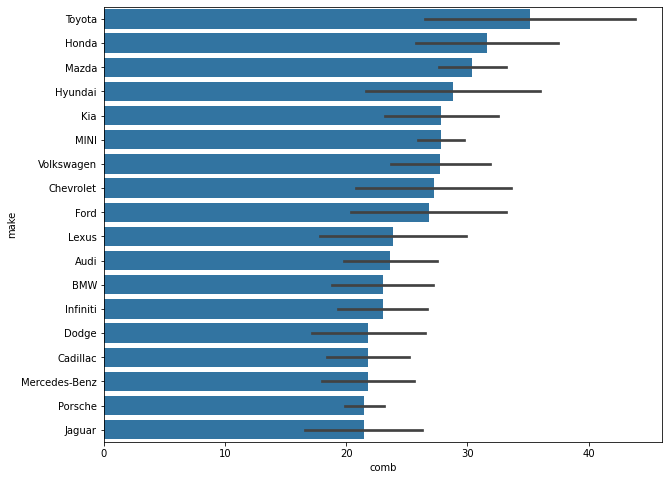

In [224]:
plt.figure(figsize=(10, 8))

base_color = sns.color_palette()[0]
sns.barplot(data=most_makes, x='comb', y='make', color=base_color, order=facet_order, ci='sd');

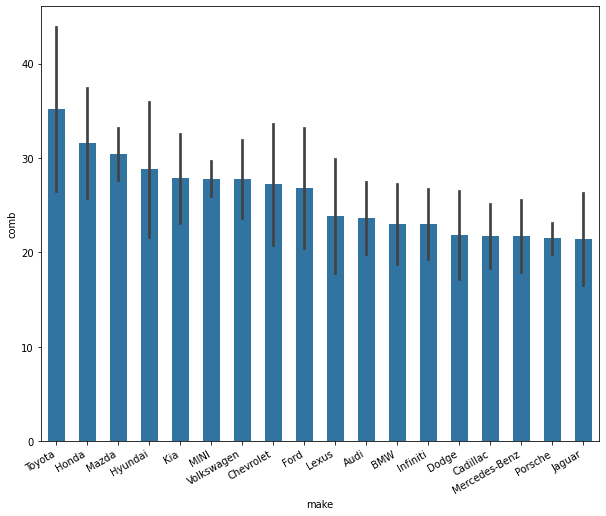

In [227]:
fig, ax = plt.subplots(figsize=(10, 8))

base_color = sns.color_palette()[0]
sns.barplot(data=most_makes, y='comb', x='make', color=base_color, order=facet_order, ci='sd', ax=ax)
plt.xticks(rotation=30, ha='right')

change_width(ax, .55);